In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

# Libraries for ANN
import tensorflow
from keras.layers import Dense, BatchNormalization, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping

# importing different optimizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam, RMSprop


## Loading Dataset

In [2]:
data = pd.read_csv('pre-processed churn prediction data.csv')

In [3]:
df = data.drop(['Unnamed: 0'], axis = 1)

In [4]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geo_France', 'Geo_Germany', 'Geo_Spain'],
      dtype='object')

#### Seperating Features and target columns

In [5]:
features = df.drop(['Exited'], axis = 1)
target = df.Exited

### Balancing the imbalanced classes

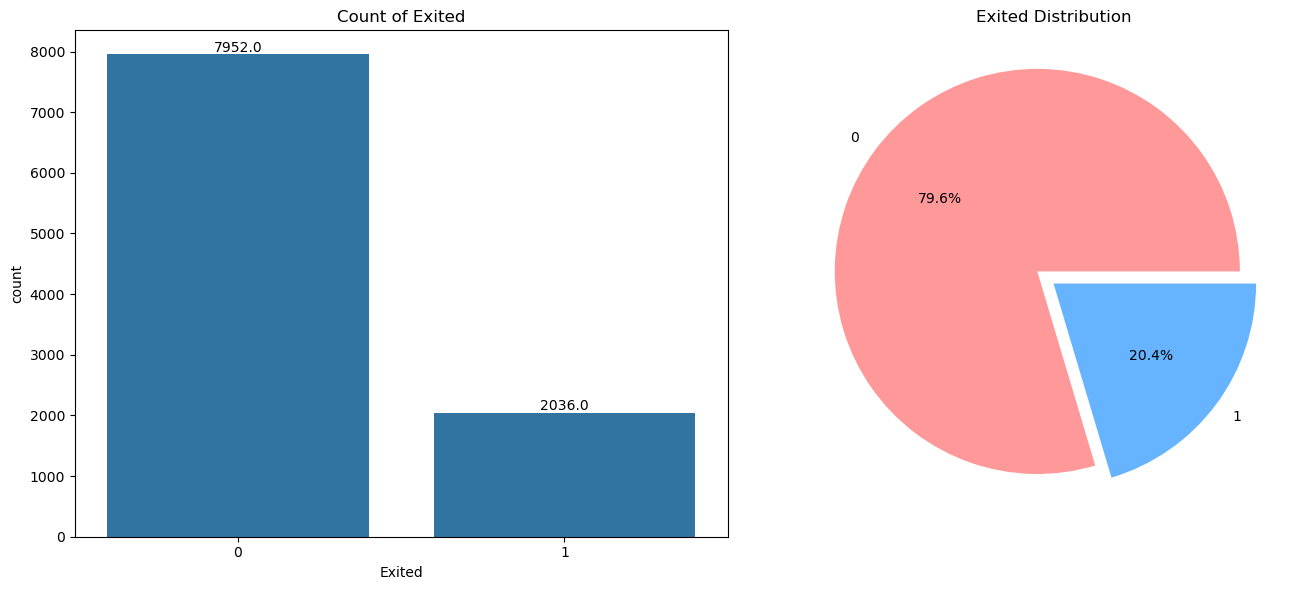

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Count plot with values on bars
sns.countplot(x='Exited', data=df, ax=axs[0])
axs[0].set_title('Count of Exited')
for p in axs[0].patches:
    height = p.get_height()
    axs[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Pie chart
exit_counts = df['Exited'].value_counts()
axs[1].pie(exit_counts, labels=exit_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], explode=(0.1, 0))
axs[1].set_title('Exited Distribution')

plt.tight_layout()
plt.show()

In [7]:
# Balancing the target class using SMOTE method
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(features, target) 

In [8]:
# Combine the majority class with the upsampled minority class
df_balanced = pd.concat([x_resampled, y_resampled])

# Shuffle the dataset
df= df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

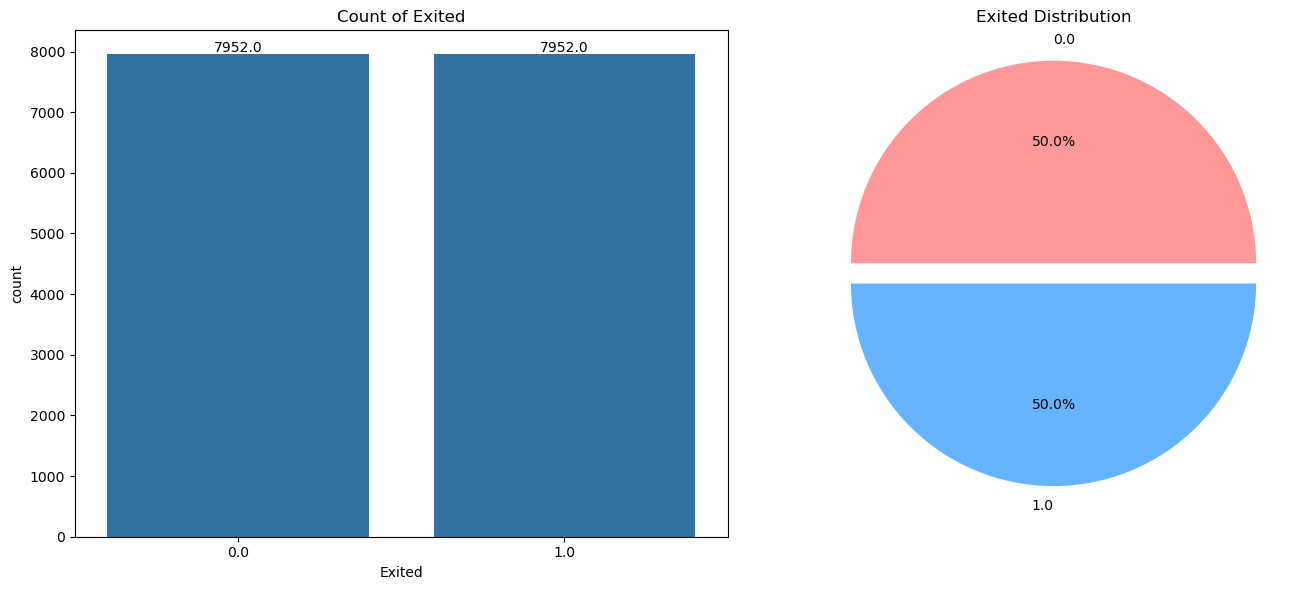

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Count plot with values on bars
sns.countplot(x='Exited', data=df, ax=axs[0])
axs[0].set_title('Count of Exited')
for p in axs[0].patches:
    height = p.get_height()
    axs[0].annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Pie chart
exit_counts = df['Exited'].value_counts()
axs[1].pie(exit_counts, labels=exit_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'], explode=(0.1, 0))
axs[1].set_title('Exited Distribution')

plt.tight_layout()
plt.show()

### Splitting Data into training and testing

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

### Standardizing the Data

In [11]:
# Normalizing the features
scaler = MinMaxScaler()
x_scale_train = scaler.fit_transform(x_train)
x_scale_test = scaler.transform(x_test)

### Creating ANN and Hidden Layers

In [12]:
model = Sequential()

In [13]:
model.add(Dense(units=64, activation='relu', input_dim = 12))
# Additional hidden layers based on best hyperparameters
model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=256, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=16, activation='relu'))
model.add(BatchNormalization())
    # Output layer
model.add(Dense(units=1, activation='sigmoid'))

C:\Users\MA\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
optimizer_adam = Adam(learning_rate = 0.0001)

model.compile(optimizer = optimizer_adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
x_train.shape

(12723, 12)

### Training our Model

In [16]:
early_stopping = EarlyStopping( patience=10, restore_best_weights=True)

history = model.fit(x_scale_train, y_train, epochs = 500, validation_data=(x_scale_test, y_test), callbacks = [early_stopping])

Epoch 1/500
398/398 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7197 - loss: 0.5520 - val_accuracy: 0.7774 - val_loss: 0.4918
Epoch 2/500
398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8073 - loss: 0.4210 - val_accuracy: 0.8324 - val_loss: 0.3751
Epoch 3/500
398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8174 - loss: 0.3933 - val_accuracy: 0.8425 - val_loss: 0.3596
Epoch 4/500
398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8277 - loss: 0.3776 - val_accuracy: 0.8406 - val_loss: 0.3571
Epoch 5/500
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8418 - loss: 0.3571 - val_accuracy: 0.8566 - val_loss: 0.3405
Epoch 6/500
398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8393 - loss: 0.3602 - val_accuracy: 0.8579 - val_loss: 0.3333
Epoch 7/500
398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8503 - loss: 0.3380 - val_accuracy: 0.8507 - val_loss: 0.3324
Epoch 8/500
398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8492 - loss: 0.3341 - val_ac

# Results

In [17]:
# checking accuracy of model
loss, accuracy = model.evaluate(x_scale_test, y_test)

print(f'\nTest Accuracy is {accuracy}')

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8636 - loss: 0.3190

Test Accuracy is 0.8654510974884033


### Training and Validation Accuracy

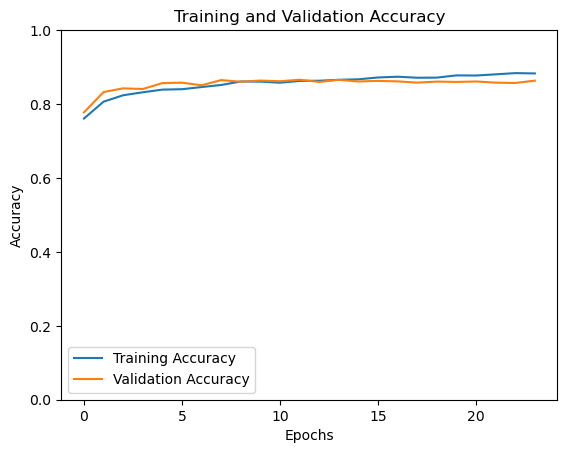

In [18]:
# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim(0, 1.00)
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

### Training and Validation Loss

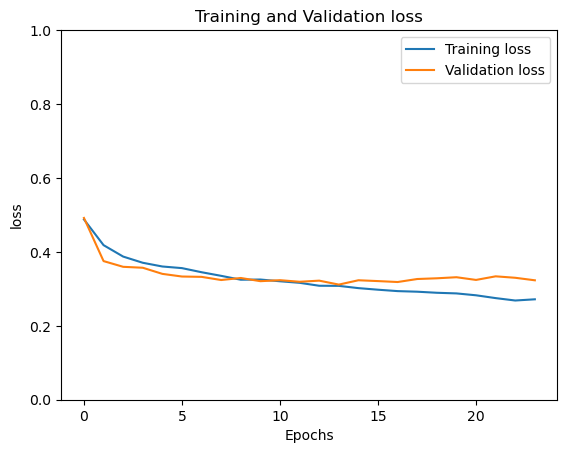

In [19]:
# Plot training accuracy
plt.plot(history.history['loss'], label='Training loss')
# Plot validation accuracy
plt.plot(history.history['val_loss'], label='Validation loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.ylim(0, 1.00)
# Add legend to the plot
plt.legend()
# Show the plot
plt.show()

## Confusion Metrix and Classification Report

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1573
           1       0.88      0.85      0.86      1608

    accuracy                           0.87      3181
   macro avg       0.87      0.87      0.87      3181
weighted avg       0.87      0.87      0.87      3181



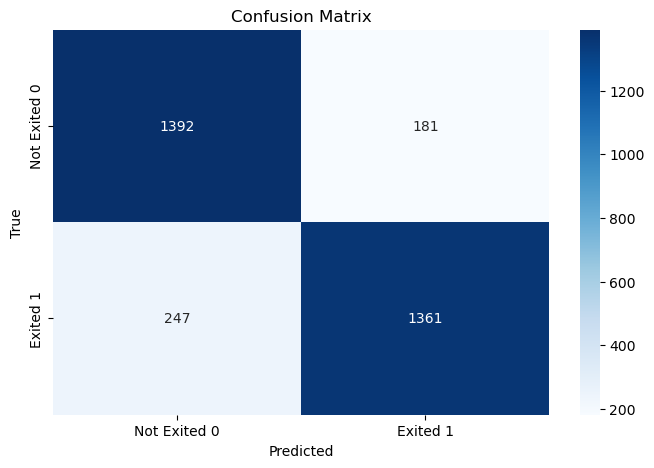

In [21]:
# Predict on test data
y_pred = model.predict(x_scale_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary class labels

# Print classification report
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Exited 0', 'Exited 1'], yticklabels=['Not Exited 0', 'Exited 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()